<img src="../../../img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699"> Web Time Series Service (WTSS)</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/wtss/wtss-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gilberto R. Queiroz<sup>* <a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Karine R. Ferreira <sup><a href="https://orcid.org/0000-0003-2656-5504"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Lubia Vinhas <sup> <a href="https://orcid.org/0000-0003-1104-3607"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>,<br/>
    Raphael Costa, Matheus Zaglia, Abner dos Anjos
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    <sup>*</sup> Author to whom correspondence should be addressed.
    <br/><br/>
    Last Update: February 24, 2021
</div>

<br/>

<div style="text-align: center;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the WTSS service to extract time series from <em>Earth Observation Data Cubes</em>.
</div>    

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Vinhas, L.; Queiroz, G. R.; Ferreira, K. R.; Camara, G. <a href="http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004" target="_blank">Web Services for Big Earth Observation Data</a>. Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.
    </div>
</div>

# Introduction
<hr style="border:1px solid #0077b9;">

The **W**eb **T**ime **S**eries **S**ervice (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. Given a location and a time interval you can retrieve the according time series as a list of real values.


In WTSS a coverage is a three dimensional array associated to spatial and temporal reference systems (Figure 1).

<img src="../../../img/image-time-series.png" width="240" />
<br/>
<b>Figura 1</b> - A coverage as a three dimensional array.

WTSS is based on three operations:

- ``list_coverages``: returns the list of all available coverages in the service.

- ``describe_coverage``: returns the metadata of a given coverage.

- ``time_series``: query the database for the list of values for a given location and time interval.

This Jupyter Notebook shows how to use WTSS in Python with Brazil Data Cube data.

# Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [WTSS client for Python](https://github.com/brazil-data-cube/wtss.py). To install it from PyPI using pip, use the following command:

In [ ]:
!pip install wtss[matplotlib]

In order to access the funcionalities of the client API, you should import the wtss package, as follows:

In [1]:
from wtss import *

After that, you should create a wtss object attached to a given service:

In [2]:
service = WTSS('https://brazildatacube.dpi.inpe.br/esensing/')

The above cell will create an object named `service` that will allow us to comunicate to the given WTSS service.

# Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

The object `service` allows to list the available coverages:

In [3]:
service.coverages

['MOD13Q1', 'MOD13Q1_M']

The names returned by property can be used in subsequent operations.

The complete `WTSS` class is documented [here](https://wtss.readthedocs.io/en/latest/class_wtss.html).

# Retrieving the Metadata of a Data Product
<hr style="border:1px solid #0077b9;">

It is possible to access the metadata of a specific coverage with the `operator[]`:

In [4]:
service['MOD13Q1']

Coverage MOD13Q1
 
 
 
 Description Vegetation Indices 16-Day L3 Global 250m
 
 
 
 Attributes 
 
 
 
 
 
 
 name 
 description 
 datatype 
 valid range 
 scale 
 nodata 
 
 
 mir 
 250m 16 days MIR reflectance (Surface Reflectance Band 7) 
 int16 
 {'min': 0.0, 'max': 10000.0} 
 0.0001 
 -1000.0 
 
 blue 
 250m 16 days blue reflectance (Surface Reflectance Band 3) 
 int16 
 {'min': 0.0, 'max': 10000.0} 
 0.0001 
 -1000.0 
 
 nir 
 250m 16 days NIR reflectance (Surface Reflectance Band 2) 
 int16 
 {'min': 0.0, 'max': 10000.0} 
 0.0001 
 -1000.0 
 
 red 
 250m 16 days red reflectance (Surface Reflectance Band 1) 
 int16 
 {'min': 0.0, 'max': 10000.0} 
 0.0001 
 -1000.0 
 
 evi 
 250m 16 days EVI (16 day EVI average) 
 int16 
 {'min': -2000.0, 'max': 10000.0} 
 0.0001 
 -3000.0 
 
 ndvi 
 250m 16 days NDVI (16 day NDVI average) 
 int16 
 {'min': -2000.0, 'max': 10000.0} 
 0.0001 
 -3000.0 
 
 
 
 
 
 Extent 
 
 
 
 
 xmin 
 ymin 
 xmax 
 ymax 
 
 
 -81.2341289433377 
 -39.9999999964109 
 -29.9999999973059 
 9.99999999910497 
 
 
 
 
 
 Timeline 
 
 
 
 2000-02-18 2000-03-05 2000-03-21 2000-04-06 2000-04-22 2000-05-08 2000-05-24 2000-06-09 2000-06-25 2000-07-11 2000-07-27 2000-08-12 2000-08-28 2000-09-13 2000-09-29 2000-10-15 2000-10-31 2000-11-16 2000-12-02 2000-12-18 2001-01-01 2001-01-17 2001-02-02 2001-02-18 2001-03-06 2001-03-22 2001-04-07 2001-04-23 2001-05-09 2001-05-25 2001-06-10 2001-06-26 2001-07-12 2001-07-28 2001-08-13 2001-08-29 2001-09-14 2001-09-30 2001-10-16 2001-11-01 2001-11-17 2001-12-03 2001-12-19 2002-01-01 2002-01-17 2002-02-02 2002-02-18 2002-03-06 2002-03-22 2002-04-07 2002-04-23 2002-05-09 2002-05-25 2002-06-10 2002-06-26 2002-07-12 2002-07-28 2002-08-13 2002-08-29 2002-09-14 2002-09-30 2002-10-16 2002-11-01 2002-11-17 2002-12-03 2002-12-19 2003-01-01 2003-01-17 2003-02-02 2003-02-18 2003-03-06 2003-03-22 2003-04-07 2003-04-23 2003-05-09 2003-05-25 2003-06-10 2003-06-26 2003-07-12 2003-07-28 2003-08-13 2003-08-29 2003-09-14 2003-09-30 2003-10-16 2003-11-01 2003-11-17 2003-12-03 2003-12-19 2004-01-01 2004-01-17 2004-02-02 2004-02-18 2004-03-05 2004-03-21 2004-04-06 2004-04-22 2004-05-08 2004-05-24 2004-06-09 2004-06-25 2004-07-11 2004-07-27 2004-08-12 2004-08-28 2004-09-13 2004-09-29 2004-10-15 2004-10-31 2004-11-16 2004-12-02 2004-12-18 2005-01-01 2005-01-17 2005-02-02 2005-02-18 2005-03-06 2005-03-22 2005-04-07 2005-04-23 2005-05-09 2005-05-25 2005-06-10 2005-06-26 2005-07-12 2005-07-28 2005-08-13 2005-08-29 2005-09-14 2005-09-30 2005-10-16 2005-11-01 2005-11-17 2005-12-03 2005-12-19 2006-01-01 2006-01-17 2006-02-02 2006-02-18 2006-03-06 2006-03-22 2006-04-07 2006-04-23 2006-05-09 2006-05-25 2006-06-10 2006-06-26 2006-07-12 2006-07-28 2006-08-13 2006-08-29 2006-09-14 2006-09-30 2006-10-16 2006-11-01 2006-11-17 2006-12-03 2006-12-19 2007-01-01 2007-01-17 2007-02-02 2007-02-18 2007-03-06 2007-03-22 2007-04-07 2007-04-23 2007-05-09 2007-05-25 2007-06-10 2007-06-26 2007-07-12 2007-07-28 2007-08-13 2007-08-29 2007-09-14 2007-09-30 2007-10-16 2007-11-01 2007-11-17 2007-12-03 2007-12-19 2008-01-01 2008-01-17 2008-02-02 2008-02-18 2008-03-05 2008-03-21 2008-04-06 2008-04-22 2008-05-08 2008-05-24 2008-06-09 2008-06-25 2008-07-11 2008-07-27 2008-08-12 2008-08-28 2008-09-13 2008-09-29 2008-10-15 2008-10-31 2008-11-16 2008-12-02 2008-12-18 2009-01-01 2009-01-17 2009-02-02 2009-02-18 2009-03-06 2009-03-22 2009-04-07 2009-04-23 2009-05-09 2009-05-25 2009-06-10 2009-06-26 2009-07-12 2009-07-28 2009-08-13 2009-08-29 2009-09-14 2009-09-30 2009-10-16 2009-11-01 2009-11-17 2009-12-03 2009-12-19 2010-01-01 2010-01-17 2010-02-02 2010-02-18 2010-03-06 2010-03-22 2010-04-07 2010-04-23 2010-05-09 2010-05-25 2010-06-10 2010-06-26 2010-07-12 2010-07-28 2010-08-13 2010-08-29 2010-09-14 2010-09-30 2010-10-16 2010-11-01 2010-11-17 2010-12-03 2010-12-19 2011-01-01 2011-01-17 2011-02-02 2011-02-18 2011-03-06 2011-03-22 2011-04-07 2011-04-23 2011-05-09 2011-05-25 2011-06-10 2011-06-26 2011-07-12 2011-07-28 2011-08-13 2011-08-29 2011-0

or:

In [ ]:
service.MOD13Q1

The coverage metadata includes its range in the spatial and temporal dimensions, the list of attributes associated to the cells, and the timeline.


Let's inspect the metadata with more detail:

In [6]:
coverage = service['MOD13Q1']

In [7]:
coverage.name

'MOD13Q1'

In [8]:
coverage.description

'Vegetation Indices 16-Day L3 Global 250m'

In [ ]:
coverage.attributes

In [ ]:
coverage.dimensions

In [ ]:
coverage.spatial_extent

In [10]:
timeline = coverage.timeline

start = timeline[0]
end = timeline[-1]

print(f'Interval range: [{start}, {end}]')

Interval range: [2000-02-18, 2019-09-30]


The complete `Coverage` class is documented [here](https://wtss.readthedocs.io/en/latest/class_coverage.html).

# Retrieving the Time Series
<hr style="border:1px solid #0077b9;">

In order to retrieve the time series for attributes `red` and `nir`, in the location of `latitude -12` and `longitude -54` from `January 1st, 2001` to `December 31st, 2001`, use the `ts` method:

In [11]:
ts = coverage.ts(attributes=('red', 'nir'),
                 latitude=-12.0, longitude=-54.0,
                 start_date='2001-01-01', end_date='2001-12-31')

Each time series can be accessed by the name of the attribute:

In [12]:
ts.red

[236.0,
 289.0,
 268.0,
 374.0,
 484.0,
 243.0,
 280.0,
 199.0,
 211.0,
 184.0,
 200.0,
 227.0,
 224.0,
 226.0,
 245.0,
 253.0,
 267.0,
 176.0,
 263.0,
 389.0,
 1872.0,
 494.0,
 1349.0]

In [ ]:
ts.nir

It is also possible to access the time points associated to the values:

In [13]:
ts.timeline

['2001-01-01',
 '2001-01-17',
 '2001-02-02',
 '2001-02-18',
 '2001-03-06',
 '2001-03-22',
 '2001-04-07',
 '2001-04-23',
 '2001-05-09',
 '2001-05-25',
 '2001-06-10',
 '2001-06-26',
 '2001-07-12',
 '2001-07-28',
 '2001-08-13',
 '2001-08-29',
 '2001-09-14',
 '2001-09-30',
 '2001-10-16',
 '2001-11-01',
 '2001-11-17',
 '2001-12-03',
 '2001-12-19']

The complete `TimeSeries` class is documented [here](https://wtss.readthedocs.io/en/latest/class_timeseries.html).

# Visualizing the Time Series with Matplotlib
<hr style="border:1px solid #0077b9;">

If you have Matplotlib and Numpy installed, it is possible to plot the time series with the `plot` method:

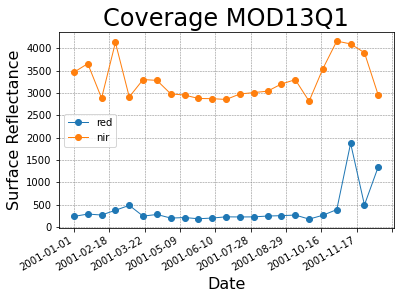

In [14]:
ts.plot()

# References
<hr style="border:1px solid #0077b9;">

- [Python Client Library for Web Time Series Service - User Guide](https://wtss.readthedocs.io/en/latest/index.html)


- [Python Client Library for Web Time Series Service - GitHub Repository](https://github.com/brazil-data-cube/wtss.py)


- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)


- [WTSS Server](https://github.com/brazil-data-cube/wtss)


- VINHAS, L.; QUEIROZ, G. R.; FERREIRA, K. R.; CÂMARA, G. [Web Services for Big Earth Observation Data](http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004). Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [WTSS Examples](./wtss-examples.ipynb)